# Machine Learning Course Notes - AndrewNg(with code implementations of Algorithms)
> My entire Machine learning course notes along with code implementations for all algorithms. The notes are based on the course taught by AndrewNg offered by stanford on Coursera.

- toc: true 
- badges: true
- comments: true
- categories: [Machine-Learning]
- image: images/stanford_ml_course.png

## Introduction to Machine learning:
* Types of Ml problems
* Types of Ml algorithms:
  * Supervised learning
  * Unsupervised learning
  * semi supervised learning
  * Reinforcement learning
* Singular Value Decomposition method

### Definition of Machine learning: 
Many attempts were made to define what is machine learning. Some of the prominent definitions are: 
* **Arthur Samuel(1959)** : Field of study that gives computers the ability to learn without being explicitly programmed.
* **Tom Mitchell(1998)**:   
A well-posed learning problem is defined as:  
A computer program is said to learn from experience "E" with respect to some task "T" and some performance measure "P", if its performance on T as measured by P improves with E.

Ex:  An email program detecting spam mails. In this example:   
* **Task "T":** classifying emails as spam or not
* **Experience "E":** watching you label email as spam or not spam
* **Performance "P":** Fraction of emails correctly classified.

### Types of ML Algorithms(based on learning methods): 
* **Supervised Learning:** We give the dataset which contains input data with the labelled ground truths so that the model can learn from it and when trained can produce results which are more close to the actual labels.
* **Unsupervised Learning:**   Allows us to approach problems with little or no idea what our results would look like. These learning algorithms are used to identify the patterns in dataset that has datapoints that are neither classified nor labelled.
* **Semi-supervised learning:**  is an approach to machine learning that combines a small amount of labeled data with a large amount of unlabeled data during training. Semi-supervised learning falls between unsupervised learning (with no labeled training data) and supervised learning (with only labeled training data). It is a special instance of weak supervision.
* **Reinforcement learning:** Reinforcement learning is a machine learning training method based on rewarding desired behaviors and/or punishing undesired ones. In general, a reinforcement learning agent is able to perceive and interpret its environment, take actions and learn through trial and error.

### Types of problems in supervised learning:
* **Regression problems:** These are problems where our predictions have continous value attribute.(for example: Housing price prediction given different factors as input in the dataset, here house prices are continuous value numbers)
* **Classification problems**: These problems have predictions that are discrete valued (for example: output is there 0(or)1 for binary classification)

### Types of problems in Unsupervised learning:
Given, a dataset the unsupervised learning algorithms will try to find some structure of pattern in the data. It decides that data lives in separate clusters. An example of this is **"Clustering Algorithm"**.  

Examples: 
* Like Newstories in google news are arranged in a cohesive way
* Genome identification and clustering the people based on genome.

## Regression problems (Linear Regression):
* Weights and Bias units
* Contour plots
* Key Idea
* Gradient Descent Algorithm
  * For linear regression
  * Batch Gradient Descent
  * Gradient Descent for Multi variable regression
* Cost Function and Loss function


### Linear Regression in One Variable:
* **Notation:** 
  * $m$ = Number of Training examples
  * $X$ = input variables/ features
  * $y$ = Output variables/ target variables/ labels/ ground truths
  * $(X,y)$ = one training example
  * $(X^{(i)}, y^{(i)})$ = ith training example.  


Important components do discuss:
* Training set: Set of training examples for the model.
* Learning algorithm: Our choice of algorithm to use for the problem.
* Hypothesis function ($h$): is a function mapping from input (features/input variables) to output(predictions)

For example:   
size of house is the input data($x$) we given in for the model in housing price prediction problem. The Estimated price will be our $y$.   

**Idea of Regression:**
Choose paramters $\theta$ and $\theta_{0}$ such that our hypothesis function $h_{\theta}(x)$ is close to $y$ for our training examples.  

For linear regression, we are going to solve a minimization problem, where the term: 
$$(h_{\theta}(x) - y)^{2} → should \ be \ minimized$$
 

Representation of our Hypothesis function: 
$$h_{\theta}(x) = \theta_{0} + \theta_{1}\cdot x$$

$$(x^{(i)}, y^{(i)}) \\ \frac{1}{2m}(\sum_{i = 1}^{m}(h_{\theta}(x) - y)^{2})$$

In general, our objective is given the hypothesis function,
$$h_{\theta}(x^{(i)}) = \theta_{0} + \theta_{1}\cdot x^{(i)}$$
Find the value of $\theta_{0}$, $\theta{1}$ so that the average of $\frac{1}{2m}(\sum_{i = 1}^{m}(h_{\theta}(x) - y)^{2})$ to be minimum.  

**Cost Function:**  

$$J(\theta_{0}, \theta{1}) = \frac{1}{2m}(\sum_{i = 1}^{m}(h_{\theta}(x) - y)^{2})$$  

In this cost function, we take "Mean squared error". This cost function can also be called as "Squared Error function".  The mean is halved($\frac{1}{2}$) as a convienience for the computation of gradient descent (as the derivative term of squared error cancels out $\frac{1}{2}$. And our goal is:
$$\min_{(\theta_{0},\theta_{1})} J(\theta_{0},\theta_{1})$$  


**An example visualization of linear regression:**

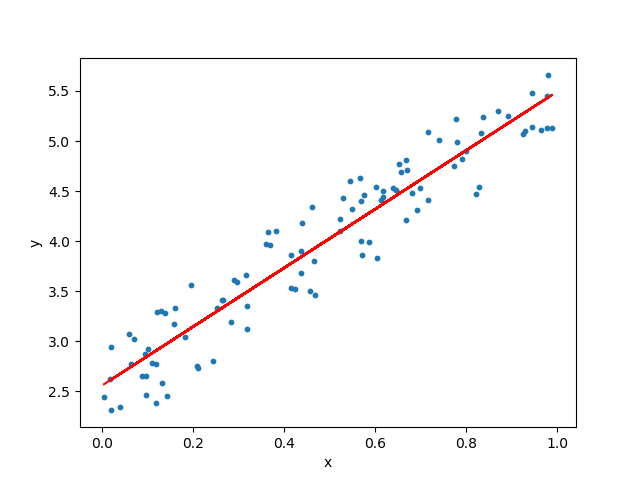

In [ ]:
# This is code implementation of Cost function.
import numpy as np
def compute_cost(X,y,theta):
  """
  Calculates the cost function for given data

  Arguments:
  X : Input features passed in as vector or matrix(if multiple features)(use numpy)
  y : Labels or ground truth values passed in as a vector
  theta : parameters matrix for calculating the hypothesis function h.(should be passed as an array)
  
  Returns:
  The cost function for all the training examples in dataset

  """
  m = len(y)
  X = np.array([np.ones((m)), X])
  print(X.shape)
  h = theta.T * X # matrix multiplication
  C=[]
  C=h-y
  C=np.square(C)
  J=np.sum(C)/(2*m)
  return J

In [ ]:
# Implementation of Gradient Descent Algorithm
def gradient_descent(X,y,theta,alpha, num_iters):
  """
  Performs the gradient descent for the Data given no of iterations

  Arguments:
  X: Input array of data (for uni-variate linear reg : dim = (m,2))
  y: labels
  theta: parameters matrix (for 2 parameters : dim = (2,1))
  Note: Dimensions of H : (m,1), Dimensions of y : (m,1) (Both should be equal)
  Returns:
  Theta values after the minimization process of loss function
  """
  J_history = np.zeros(num_iters, 1)
  m = len(y)
  for iters in range(num_iters-1):
    H = np.matmul(X,theta)
    J = np.square(H-y)
    K = (X.T) * J
    K = K/m
    # Theta update step(parameter update step)

    theta = theta - ((alpha)*K)
    J_history[iters] = compute_cost(X, y, theta)
    return [theta, J_history]



In [ ]:
# An example code snippet illustrating the linear regression 
# Loading the dataset and preparing the data for the model training
import pandas as pd
df = pd.read_csv("/content/linear_reg.csv", names= ["X","y"])
X = df["X"].to_numpy()
y = df["y"].to_numpy()
theta  = np.array([1 , 2])
X = np.expand_dims(X, axis = 1)
y = np.expand_dims(y, axis = 1)
theta = np.expand_dims(theta, axis = 1)
X.shape, y.shape, theta.shape

### Contour Plots:   

A contour plot is a graph that contain many contour lines. A contour line of a two variable function has a constant value at all points of the same line.  
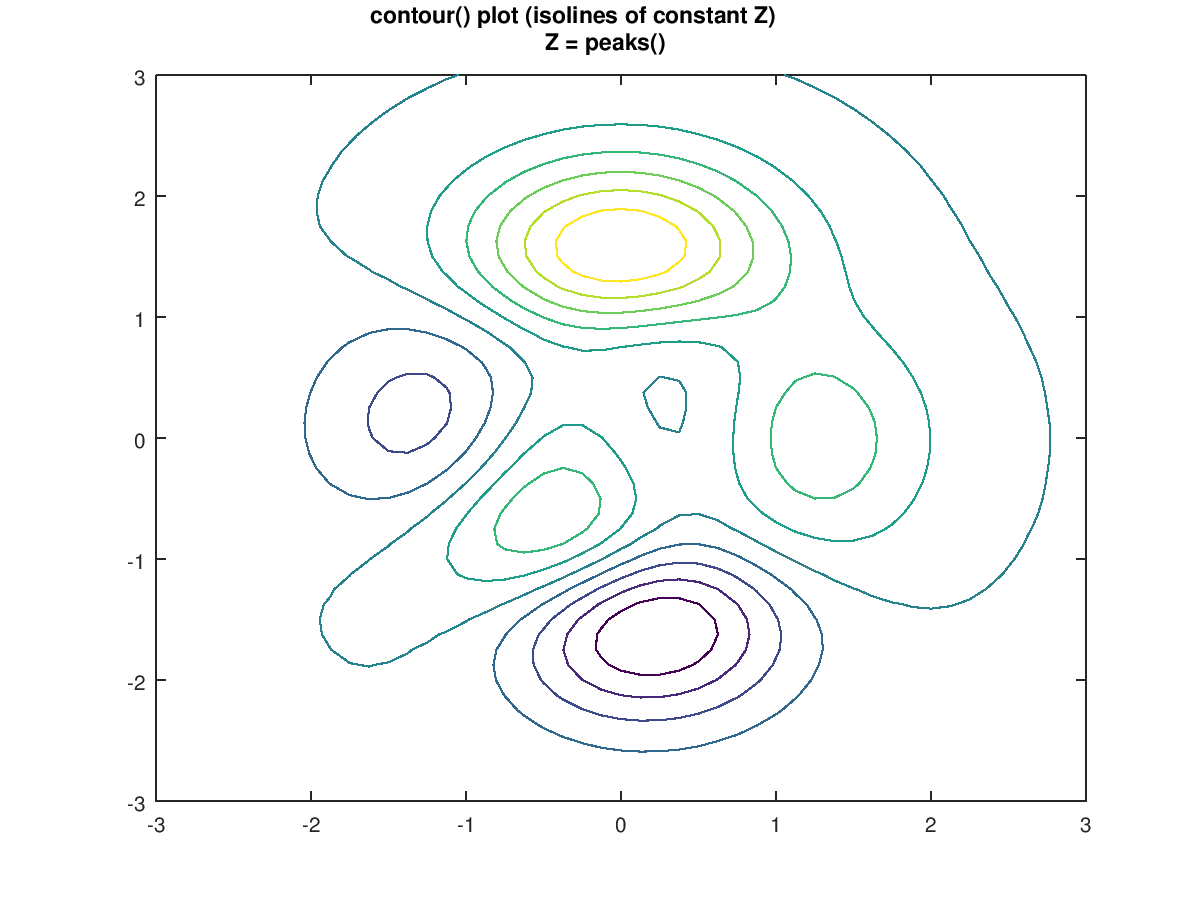

### Gradient Descent Algorithm:  
Now that we have some cost function that needs to be minimized.   
Outline of Gradient Descent:  
* Start with some $\theta_{0}, \theta{1}$, for example say $\theta_{0} = 0$ and $\theta_{1}=0$
* Keep changing $\theta_{0} ,\theta_{1}$ to reduce $J(\theta_{0} ,\theta_{1})$  until we hopefully end up at a minimum.
* In general case:  
$$J(\theta_{0}, \theta_{1}, \theta_{2}, \theta_{3}, ...,\theta_{n})$$
$$\min_{(\theta_{0},\theta_{1}, \theta_{2},.... \theta_{n})} J(\theta_{0},\theta_{1}, \theta_{2}, \theta_{3}...., \theta_{n})$$  

#### Algorithm:  
Repeat until convergence { 
$$\theta_{j} := \theta_{j} - (\alpha)\frac{\partial J(\theta_{0}, \theta_{1})}{\partial θ_{j}} for j = 0 \ and \ j = 1$$

}
* $\alpha$ is the learning rate(It determines how big a step we take during the optimization)
* $\theta_{0}, \theta_{1}$ are the parameters when j = 0 and j = 1

## Some Important Concepts: 
* Mean normalization
* Learning Rate
* Normal Equation(alternative method)


In [ ]:
def mean_normalization(X):
    """
    Performs the feature normalization step for the Input data

    Arguments:
    X : Array of Input data
    How is X stacked? Dimensions of X
    Returns:
    Mean normalized input data( Mean value of the data will be zero)
    """
    X_norm = (X - np.mean(X))/(np.max(X)- np.min(X))
    return X_norm

In [ ]:
def normal_eqn_method(X,y):
  """
  Calculates the paramter matrix or theta by using Normal Equation method

  Arguments:
  X: Input array (features)
  y: Labels

  Returns:
  theta : Parameter matrix
  """
  theta = np.linalg.inv((X.T)*X) * (X.T) * y
  return theta


## Classification Problems(Logistic Regression)


### Logistic Regression:  
Logistic Regression is used for classification problems. Given an Input data will classify the data into discrete number of classes.  

There are different types of classification problems:  
* **Binary Classification :** Here the data is classified into two classes. 
$$y \in \{ 0,1 \}$$
* **Multi-Class Classification :** In this type there are multiple labels associated with the Input data. 
$$y \in \{ 0, 1, 2, 3, ....\}$$

In logistic regression there is a threshold given to the model if the hypothesis function conditioned on threshold value will give us the prediction(i.e. the class to which the Input example belongs to).  
Example: If there is a hypothesis function say, $h_{\theta}(x)$ and in a binary classification problem if the threshold is set to be 0.5. Then,
* If $h_{\theta}(x) \geq 0.5$, then predict "$y = 1$"
* If $h_{\theta}(x) < 0.5$, then predict "$y = 0$"  


So, How do we represent the hypothesis function in logistic regression:   

We want the hypothesis function to be between 0 and 1
$$0\leq h_{\theta}(x) \leq 1 $$

$$h_{\theta}(x) = \frac{1}{1+ e^{-\theta^{T}(x)}}$$
The above function is called **sigmoid function**. 

If we take $\theta^{T}(x)$ as $z$ then $h_{\theta}(x) = g(z)$ and 
$$g(z) = \frac{1}{1+ e^{-\theta^{T}(x)}}$$  

**Note:** The Values that the hypothesis function is outputting is the prediction probabilities for each class.

Text(0.5, 1.0, 'A Sample plot of Sigmoid Curve')

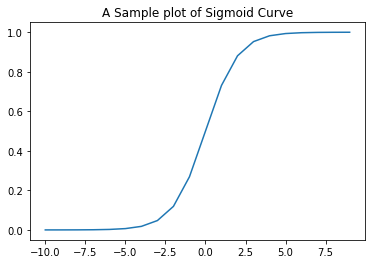

In [4]:
#Plot of the sigmoid curve
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-10, 10)
y = sigmoid(z)
plt.plot(z,y)
plt.title("A Sample plot of Sigmoid Curve")

### Cost Function for Logistic Regression: 

The Cost function for the Logistic Regression can be defined as:  
$$
  Cost(h_{\theta}(x) = 
  \begin{cases}
    \! % artifact from aligned(at)
    \begin{alignedat}{2}
      & - \log(h_{\theta}(x)), \ if \ y = 1;
      \\
      & - \log(1-h_{\theta}(x)), \ if \ y = 0;
      \\
    \end{alignedat}
  \end{cases}
$$    

$Cost = 0$  if $y = 1$ and $h_{\theta}(x) = 1$
But as $h_{\theta}(x) \rightarrow 0 $  then, $Cost \rightarrow \infty$  


It captures the intuition that if $h_{\theta}(x) = 0 $ then predict $P(y = 1 | \ x;\theta) = 0$,   
But when $y = 1$ we'll penalize learning algorithm by a very large cost.  

### Simplified Version of Cost function for logistic regression:  

$$Cost(h_{\theta}(x), y ) = -y\cdot \log(h_{\theta}(x) - (1-y) \cdot \log(1- h_{\theta}(x)$$  
We obtained this version by combining both equations from previous version of our cost function.  

* If $y = 1$ : $Cost(h_{\theta}(x), y) = - \log(h_{\theta}(x))$
* If $y = 0$ : $Cost(h_{\theta}(x), y) = - \log(1 - h_{\theta}(x))$  

This cost function below is derived from statistics using the principle of maximum likelihood estimation. It is also convex. So it converges to a global minimum.  
$$\begin{equation}
J(\theta) = \sum^{m}_{i=1} Cost(h_{\theta}(x^{(i)}),y^{(i)})
\end{equation}$$
$$\begin{equation}
J(\theta) = \frac{1}{m} \Big\{ \sum^{m}_{i=1} y^{(i)}\log(h_{\theta}(x^{(i)})) + (1- y^{(i)})\log(1-h_{\theta}(x)) \Big\}
\end{equation}$$  


To fit paramters $\theta$ : $\min_{\theta} {J(\theta)}$

To make a prediction given any $x$:
$$Output: \ h_{\theta}(x) = \frac{1}{1+ e^{-\theta^{T}(x)}}$$
 
$P(y=1| \ x ; \theta) \rightarrow This \ is \ our \ Hypothesis!!!$


### Gradient Descent for Logistic Regression:  

The Implementation of gradient descent step is the same as that for Linear Regression. But the only difference here will be the hypothesis function is different.  

#### Algorithm:  
Repeat until convergence { 
$$\theta_{j} := \theta_{j} - (\alpha)\frac{\partial J(\theta_{0}, \theta_{1})}{\partial θ_{j}} simulataneously \ update \ for \ all \ j$$

}
* $\alpha$ is the learning rate(It determines how big a step we take during the optimization)  


There are other algorithms alternative to Gradient Descent but most of them are complex. Some of them are: 
* **Conjugate Gradient Algorithm**
* **Broyden–Fletcher–Goldfarb–Shanno (BFGS)** algorithm is an iterative method for solving unconstrained nonlinear optimization problems.
* **L-BFGS Algorithm:** Limited-memory BFGS (L-BFGS or LM-BFGS) is an optimization algorithm in the family of quasi-Newton methods that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm (BFGS) using a limited amount of computer memory.  

**Advantages of the above algorithms mentioned:** 
* No need to manually check $\alpha$ (the learning rate)
* Often faster than Gradient Descent

**Drawbacks:** More Complex than gradient descent.

In [ ]:
# Implementation of Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

In [ ]:
# Loading the data (cat/non-cat)
import pandas as pd
def load_dataset(path_to_csv, col_names= []):
  """
  Loads the dataset of our choice from the csv data format file

  Arguments:
  path_to_csv: A string indicating the path to the csv file to be loaded
  col_names: A list to be passed in for getting the column headings in dataframe. 

  returns:
  A pandas dataframe for the dataset
  """
  if col_names == []:
    df = pd.read_csv(path_to_csv)
  else:
    df = pd.read_csv(path_to_csv, names = col_names)
  
  return df





def data_summary(train_set_X, test_set_X, train_set_y, test_set_y):
  m_train = train_set_X.shape[0]
  m_test =  test_set_X.shape[0]
  num_px = train_set_X.shape[1]


  print ("Number of training examples: m_train = " + str(m_train))
  print ("Number of testing examples: m_test = " + str(m_test))
  print ("Height/Width of each image: num_px = " + str(num_px))
  print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
  print ("train_set_x shape: " + str(train_set_X.shape))
  print ("train_set_y shape: " + str(train_set_y.shape))
  print ("test_set_x shape: " + str(test_set_X.shape))
  print ("test_set_y shape: " + str(test_set_y.shape))

## Introduction to Neural Networks (with example problem)